# Trainingdata Sentiwordnet without stopword cleaning

In [1]:
import pandas as pd # for data processing
import matplotlib.pyplot as plt # to create stat and visualize data
import matplotlib as mpl # to visualize data
import seaborn as sns # to visualize data
from sklearn.metrics import * # calculation of metrics for validation purposes 
import nltk # importing nltk            
from nltk.corpus import sentiwordnet as swn # importing sentiwordnet dictionary

setting to show full text content

In [2]:
pd.set_option('display.max_colwidth', None)

## Loading data

In [3]:
df_sentiwordnet_with_stopwords = pd.read_csv('../../Data-Preparation/sentiment140/traindata_with_stopwords_preprocessed.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../../../Data-Preparation/sentiment140/traindata_with_stopwords_preprocessed.csv'

In [ ]:
df_sentiwordnet_with_stopwords['target'].value_counts()

target
4    640000
0    640000
Name: count, dtype: int64

In [ ]:
df_sentiwordnet_with_stopwords.head()

,Text,target,Ground_Truth_Label
0,Rise and shining lol. I'm up a few mins later then planned but no rush i'll be out the door in time,4,positive
1,Had a 2nd interview today. It's looking promising.,4,positive
2,@EmilyAlbracht I feel your pain!,0,negative
3,http://twitpic.com/6sdbj - 4yr old son and I went exploring &amp; hiking today and this is what we found Luv amphibians!,4,positive
4,is lonely because all my housemates have gone to the pub,0,negative


## Classifying sentiments 

This classifier uses only the most common meaning (lemma) of each word. For example, if the word "dog" appears, it is assumed to refer to the animal rather than being used as an insult. The sentiment score is determined based on this assumption.

In [ ]:
def superNaiveSentiment(review):
    reviewPolarity = 0.0
    numExceptions = 0
    words = review.lower().split()
    
    for word in words:
        weight = 0.0
        synsets = list(swn.senti_synsets(word))
        if synsets:
            common_meaning = synsets[0]
            pos_score = common_meaning.pos_score()
            neg_score = common_meaning.neg_score()
            if pos_score > neg_score:
                weight += pos_score
            elif pos_score < neg_score:
                weight -= neg_score
        else:
            numExceptions += 1
        reviewPolarity += weight
    return reviewPolarity


In [ ]:
df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'] = df_sentiwordnet_with_stopwords['Text'].apply(lambda x: 'positive' if superNaiveSentiment(x) >= 0 else 'negative')

In [ ]:
df_sentiwordnet_with_stopwords.head()

,Text,target,Ground_Truth_Label,Sentiwordnet_Classification
0,Rise and shining lol. I'm up a few mins later then planned but no rush i'll be out the door in time,4,positive,positive
1,Had a 2nd interview today. It's looking promising.,4,positive,positive
2,@EmilyAlbracht I feel your pain!,0,negative,positive
3,http://twitpic.com/6sdbj - 4yr old son and I went exploring &amp; hiking today and this is what we found Luv amphibians!,4,positive,positive
4,is lonely because all my housemates have gone to the pub,0,negative,positive


## Testing quality of the classifier on training data

In [ ]:
accuracy = accuracy_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'])
print(f'Accuracy: {accuracy}')

Accuracy: 0.5829796875


In [ ]:
accuracy = accuracy_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'])
precision = precision_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'], pos_label='positive')
recall = recall_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'], pos_label='positive')
f1 = f1_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'], pos_label='positive')

beta = 1 / (2**0.5)
f_beta = fbeta_score(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'],beta=beta, pos_label='positive')


In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

print(f"F-beta Score (beta={beta}): {f_beta}")

Accuracy: 0.58
Precision: 0.56
Recall: 0.83
F1 Score: 0.67


In [ ]:
print("\nClassification Report:\n")
print(classification_report(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'], target_names=['negative', 'positive']))


Classification Report:

              precision    recall  f1-score   support

    negative       0.66      0.34      0.45    640000
    positive       0.56      0.83      0.67    640000

    accuracy                           0.58   1280000
   macro avg       0.61      0.58      0.56   1280000
weighted avg       0.61      0.58      0.56   1280000



creating heatmap to visualize false positives and false negatives

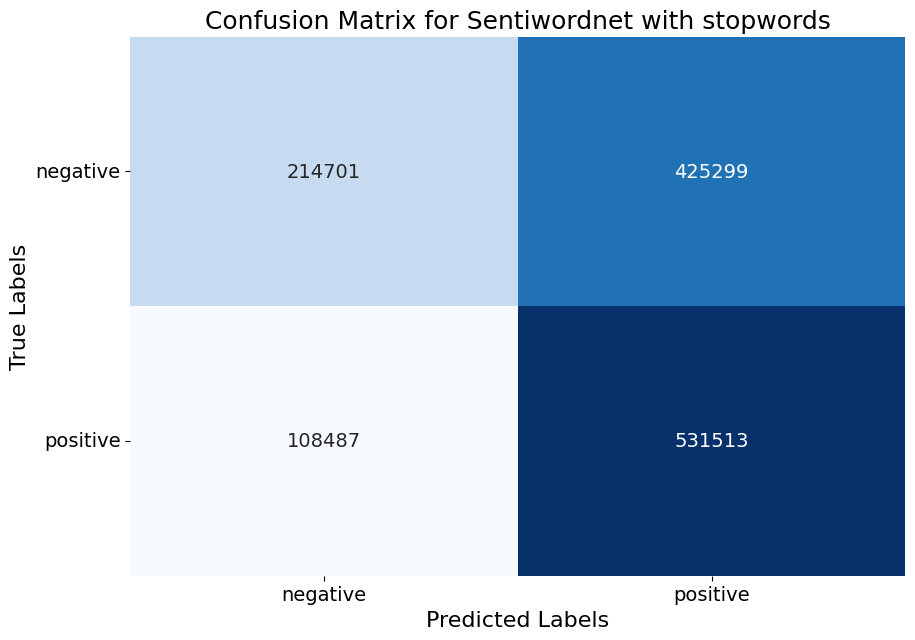

In [ ]:
cm_nb = confusion_matrix(df_sentiwordnet_with_stopwords['Ground_Truth_Label'], df_sentiwordnet_with_stopwords['Sentiwordnet_Classification'])
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for Sentiwordnet with stopwords', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()